In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from rdkit import Chem

In [2]:
def canonize(mol):
    return Chem.MolToSmiles(Chem.MolFromSmiles(mol), isomericSmiles=True, canonical=True)

In [3]:
train_df = pd.read_csv("train.csv")
train_df["mol"] = train_df["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
train_df["AlogP"] = np.where(pd.isna(train_df["AlogP"]), train_df["LogD"], train_df["AlogP"])
# 중복 데이터 삭제
canon_smiles = []
for molecule in train_df["SMILES"]:
    canon_smiles.append(canonize(molecule))
train_df["canon_smile"] = canon_smiles
indexs = train_df.index[train_df["canon_smile"].duplicated()]
train_df = train_df.drop(indexs)
train_df.reset_index(drop=True, inplace=True)

In [6]:
train_df.drop(columns=["mol", "canon_smile"], inplace=True)
train_df.head()

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,mol,canon_smile
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,<rdkit.Chem.rdchem.Mol object at 0x167d6d660>,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,<rdkit.Chem.rdchem.Mol object at 0x167d6d740>,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,<rdkit.Chem.rdchem.Mol object at 0x167d6d6d0>,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,<rdkit.Chem.rdchem.Mol object at 0x167d6d7b0>,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,<rdkit.Chem.rdchem.Mol object at 0x167d6d820>,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2


/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


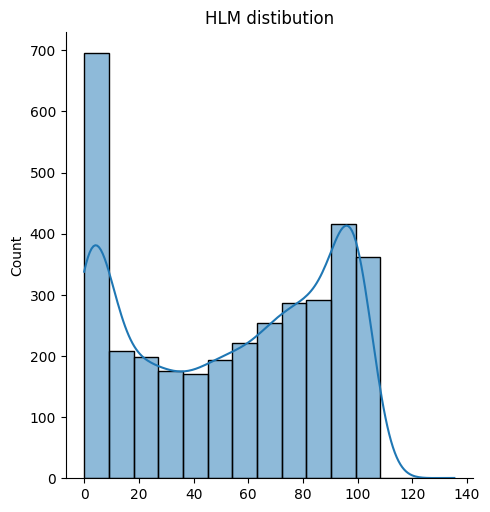

In [7]:
x = train_df["HLM"].values
sns.displot(data=x, kde=True)
plt.title("HLM distibution")
plt.show()

/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


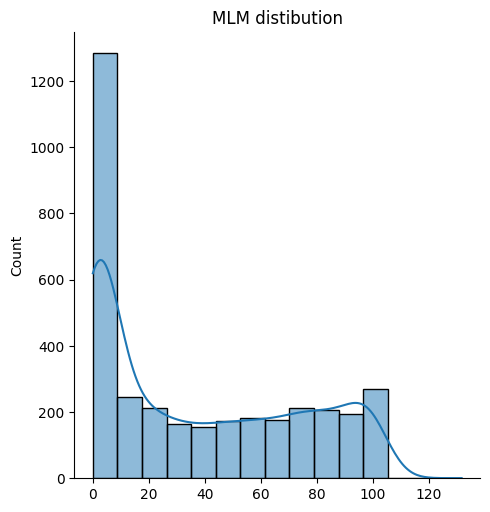

In [8]:
x = train_df["MLM"].values
sns.displot(data=x, kde=True)
plt.title("MLM distibution")
plt.show()

/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/BSH/Desktop/Programming/molecularGNN_smiles/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1

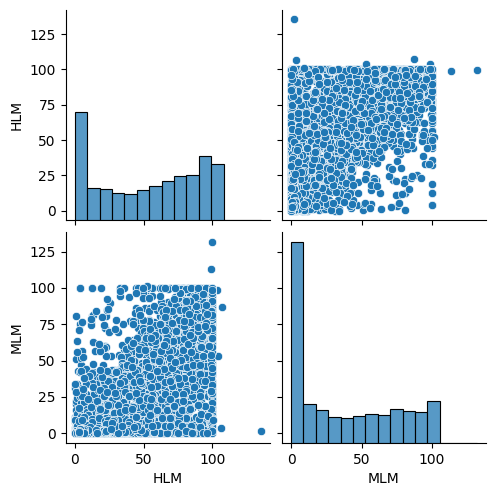

In [9]:
sns.pairplot(data=train_df[["HLM", "MLM"]])

In [4]:
dict_lst = [defaultdict(list), defaultdict(list)]
for name, dictionary in zip(["HLM", "MLM"], dict_lst):
    for idx, row, in train_df.iterrows():
        if row[name] <= 20:
            dictionary[f"{name}_0-20"].append(idx)
        elif row[name] <= 40:
            dictionary[f"{name}_20-40"].append(idx)
        elif row[name] <= 60:
            dictionary[f"{name}_40-60"].append(idx)
        elif row[name] <= 80:
            dictionary[f"{name}_60-80"].append(idx)
        else:
            dictionary[f"{name}_80-"].append(idx)

In [5]:
val_size = 0.2
for dictionary, name in zip(dict_lst, ["HLM", "MLM"]):
    val = pd.DataFrame(columns=train_df.columns)
    train = pd.DataFrame(columns=train_df.columns)
    for v in dictionary.values():
        np.random.shuffle(v)
        val_indexs = v[:int(len(v)*val_size)]
        train_indexs = v[int(len(v)*val_size):]
        val = pd.concat([val, train_df.iloc[val_indexs]])
        train = pd.concat([train, train_df.iloc[train_indexs]])
    train.drop(columns=["mol", "canon_smile"], inplace=True)
    val.drop(columns=["mol", "canon_smile"], inplace=True)

    train.to_csv(f"{name}_train.csv", index=False)
    val.to_csv(f"{name}_val.csv", index=False)

/var/folders/12/hw__cz4532l927rq30s78rrr0000gp/T/ipykernel_45194/2914223456.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, train_df.iloc[val_indexs]])
/var/folders/12/hw__cz4532l927rq30s78rrr0000gp/T/ipykernel_45194/2914223456.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train = pd.concat([train, train_df.iloc[train_indexs]])
/var/folders/12/hw__cz4532l927rq30s78rrr0000gp/T/ipykernel_45194/2914223456.py:9: FutureWarning: The behavior of DataFrame concatenation 